In [1]:
import geopandas as gpd
import pandas as pd
import contextily as ctx
import plotly.express as px
import contextily as cx
import numpy as np
import matplotlib.pyplot as plt

# set font
import matplotlib as mpl

# for Mac
mpl.rc('font',family='Hiragino Maru Gothic Pro')

# for PC
# mpl.rc('font',family='MS Gothic')

In [3]:
kochimesh1 = gpd.read_file('data2/SDDSWS4932')
kochimesh2 = gpd.read_file('data2/SDDSWS5032')
kochimesh3 = gpd.read_file('data2/SDDSWS5033')
kochimesh4 = gpd.read_file('data2/SDDSWS5034')

In [4]:
# combine all four mesh shapes
kochimesh = gpd.pd.concat([kochimesh1,kochimesh2,kochimesh3,kochimesh4])

<Axes: >

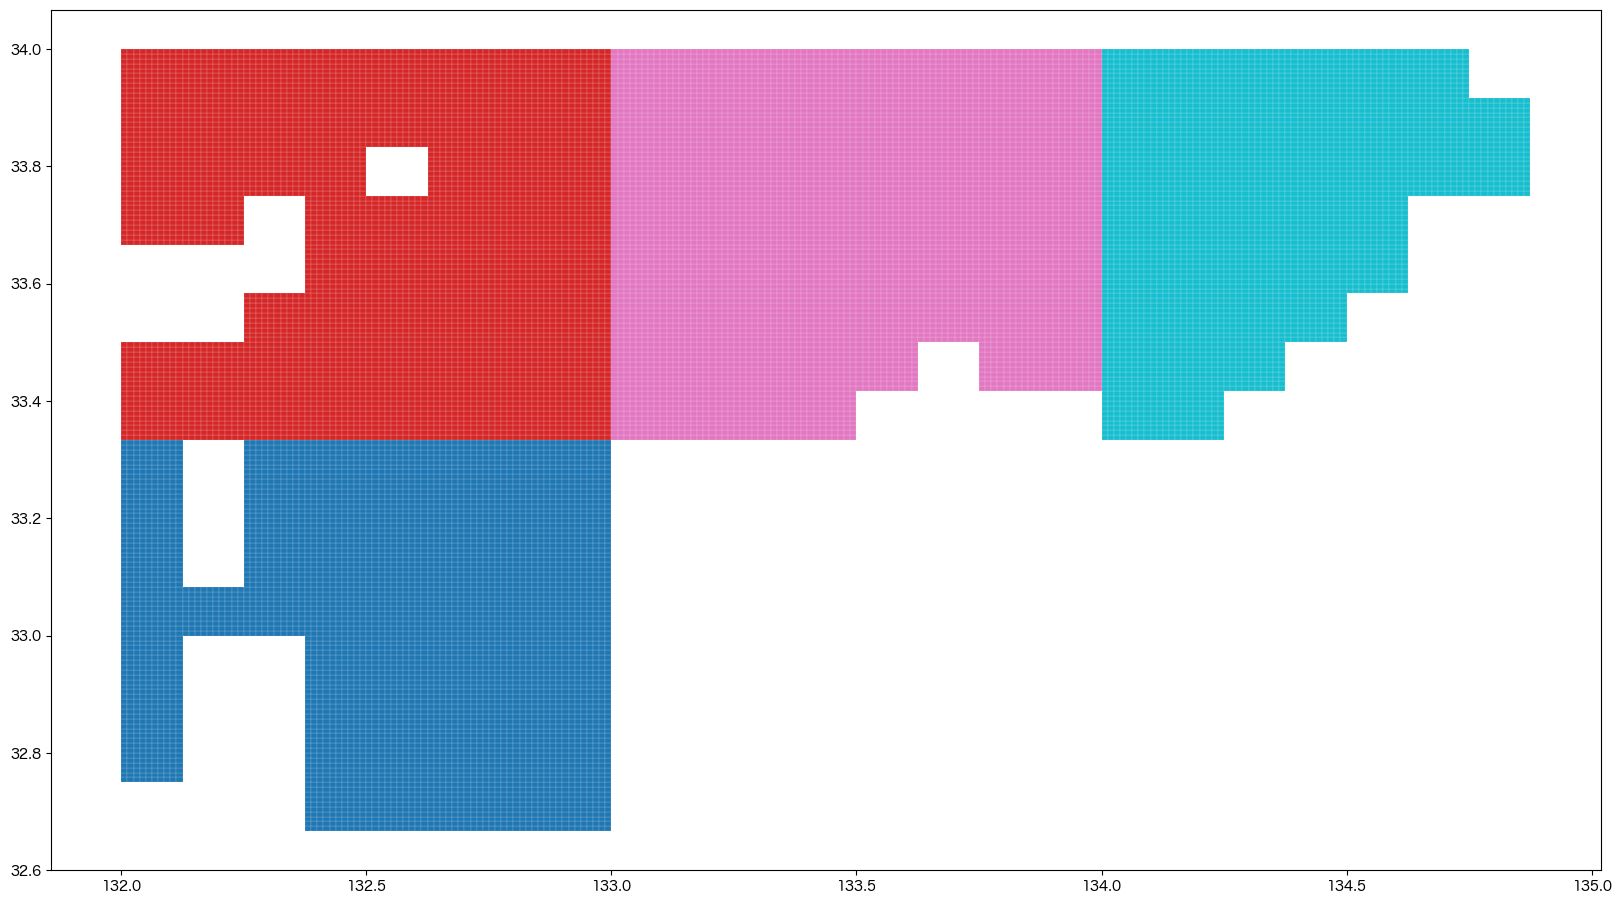

In [5]:
kochimesh.plot(figsize=(20,20),edgecolor='white',linewidth=0.1,column='MESH1_ID')

In [6]:
kochidata1 = pd.read_csv('data2/tblT001100S4932', encoding='cp932')
kochidata2 = pd.read_csv('data2/tblT001100S5032', encoding='cp932')
kochidata3 = pd.read_csv('data2/tblT001100S5033', encoding='cp932')
kochidata4 = pd.read_csv('data2/tblT001100S5034', encoding='cp932')
kochidata5 = pd.read_csv('data2/tblT000846S4932', encoding='cp932')
kochidata6 = pd.read_csv('data2/tblT000846S5032', encoding='cp932')
kochidata7 = pd.read_csv('data2/tblT000846S5033', encoding='cp932')
kochidata8 = pd.read_csv('data2/tblT000846S5034', encoding='cp932')

### 定義書を確認

## 2020年

<img src="https://github.com/okazama/GIS/blob/main/T001100.pdf">

## 2015年
<img src="https://github.com/okazama/GIS/blob/main/T000846.pdf">

In [8]:
# check data
kochidata5.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T000846001,T000846002,T000846003,T000846004,T000846005,T000846006,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
0,NaN,NaN,NaN,NaN,人口総数,人口総数 男,人口総数 女,０～１４歳人口総数,０～１４歳人口 男,０～１４歳人口 女,...,６人世帯の一般世帯数,７人以上世帯の一般世帯数,親族のみの一般世帯数,核家族の一般世帯数,核家族以外の一般世帯数,６歳未満世帯員のいる一般世帯数,６５歳以上世帯員のいる一般世帯数,世帯主の年齢が２０～２９歳の１人世帯の一般世帯数,高齢単身の一般世帯数,高齢夫婦のみの一般世帯数
1,49320453.0,0.0,NaN,NaN,9,4,5,0,0,0,...,0,0,4,4,0,0,3,0,0,2
2,49320454.0,0.0,NaN,NaN,22,11,11,0,0,0,...,0,0,7,7,0,0,13,0,6,3
3,49320463.0,2.0,49320464.0,NaN,4,2,2,*,*,*,...,*,*,*,*,*,*,*,*,*,*
4,49320464.0,1.0,NaN,49320463,25,10,15,2,0,2,...,0,0,9,8,1,1,10,0,5,5


In [9]:
# 8つのテーブルから１行目を削除
kochidata1 = kochidata1[1:]
kochidata2 = kochidata2[1:]
kochidata3 = kochidata3[1:]
kochidata4 = kochidata4[1:]
kochidata5 = kochidata5[1:]
kochidata6 = kochidata6[1:]
kochidata7 = kochidata7[1:]
kochidata8 = kochidata8[1:]

In [10]:
# ４つのテーブルから「＊」を非数に置き換える
kochidata1 = kochidata1.replace('*',np.nan)
kochidata2 = kochidata2.replace('*',np.nan)
kochidata3 = kochidata3.replace('*',np.nan)
kochidata4 = kochidata4.replace('*',np.nan)
kochidata5 = kochidata5.replace('*',np.nan)
kochidata6 = kochidata6.replace('*',np.nan)
kochidata7 = kochidata7.replace('*',np.nan)
kochidata8 = kochidata8.replace('*',np.nan)

## 2015年と2020年のデータを統合

In [11]:
kochidata2020 = pd.concat([kochidata1,kochidata2,kochidata3,kochidata4])

In [12]:
kochidata2015 = pd.concat([kochidata5,kochidata6,kochidata7,kochidata8])

In [13]:
kochidata2015.head()

,KEY_CODE,HTKSYORI,HTKSAKI,GASSAN,T000846001,T000846002,T000846003,T000846004,T000846005,T000846006,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
1,49320453.0,0.0,NaN,NaN,9,4,5,0,0,0,...,0,0,4,4,0,0,3,0,0,2
2,49320454.0,0.0,NaN,NaN,22,11,11,0,0,0,...,0,0,7,7,0,0,13,0,6,3
3,49320463.0,2.0,49320464.0,NaN,4,2,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,49320464.0,1.0,NaN,49320463,25,10,15,2,0,2,...,0,0,9,8,1,1,10,0,5,5
5,49320465.0,1.0,NaN,49320475,9,4,5,0,0,0,...,0,0,6,5,1,0,7,0,2,3


### 'HTKSYORI', 'HTKSAKI', 'GASSAN'を kochidata2015 and kochidata2020 から削除

In [14]:
# get rid of HTKSYORI, HTKSAKI, GASSAN
columns=['HTKSYORI','HTKSAKI','GASSAN']
kochidata2015=kochidata2015.drop(columns=columns)

In [15]:
kochidata2020=kochidata2020.drop(columns=columns)

In [16]:
# combine 2015 and 2020 data
kochidata = pd.merge(kochidata2020,kochidata2015,on='KEY_CODE')

In [17]:
# check data info
kochidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6989 entries, 0 to 6988
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6989 non-null   float64
 1   T001100001  6989 non-null   object 
 2   T001100002  6989 non-null   object 
 3   T001100003  6989 non-null   object 
 4   T001100004  5414 non-null   object 
 5   T001100005  5414 non-null   object 
 6   T001100006  5414 non-null   object 
 7   T001100007  5414 non-null   object 
 8   T001100008  5414 non-null   object 
 9   T001100009  5414 non-null   object 
 10  T001100010  5414 non-null   object 
 11  T001100011  5414 non-null   object 
 12  T001100012  5414 non-null   object 
 13  T001100013  5414 non-null   object 
 14  T001100014  5414 non-null   object 
 15  T001100015  5414 non-null   object 
 16  T001100016  5414 non-null   object 
 17  T001100017  5414 non-null   object 
 18  T001100018  5414 non-null   object 
 19  T001100019  5414 non-null  

In [18]:
# まずはカラムをアウトプット
kochidata.columns

Index(['KEY_CODE', 'T001100001', 'T001100002', 'T001100003', 'T001100004',
       'T001100005', 'T001100006', 'T001100007', 'T001100008', 'T001100009',
       'T001100010', 'T001100011', 'T001100012', 'T001100013', 'T001100014',
       'T001100015', 'T001100016', 'T001100017', 'T001100018', 'T001100019',
       'T001100020', 'T001100021', 'T001100022', 'T001100023', 'T001100024',
       'T001100025', 'T001100026', 'T001100027', 'T001100028', 'T001100029',
       'T001100030', 'T001100031', 'T001100032', 'T001100033', 'T001100034',
       'T001100035', 'T001100036', 'T001100037', 'T001100038', 'T001100039',
       'T001100040', 'T001100041', 'T001100042', 'T001100043', 'T001100044',
       'T001100045', 'T001100046', 'T001100047', 'T001100048', 'T001100049',
       'T001100050', 'T000846001', 'T000846002', 'T000846003', 'T000846004',
       'T000846005', 'T000846006', 'T000846007', 'T000846008', 'T000846009',
       'T000846010', 'T000846011', 'T000846012', 'T000846013', 'T000846014',
 

In [19]:
# 1番目以降をアウトプット
kochidata.columns[1:]

Index(['T001100001', 'T001100002', 'T001100003', 'T001100004', 'T001100005',
       'T001100006', 'T001100007', 'T001100008', 'T001100009', 'T001100010',
       'T001100011', 'T001100012', 'T001100013', 'T001100014', 'T001100015',
       'T001100016', 'T001100017', 'T001100018', 'T001100019', 'T001100020',
       'T001100021', 'T001100022', 'T001100023', 'T001100024', 'T001100025',
       'T001100026', 'T001100027', 'T001100028', 'T001100029', 'T001100030',
       'T001100031', 'T001100032', 'T001100033', 'T001100034', 'T001100035',
       'T001100036', 'T001100037', 'T001100038', 'T001100039', 'T001100040',
       'T001100041', 'T001100042', 'T001100043', 'T001100044', 'T001100045',
       'T001100046', 'T001100047', 'T001100048', 'T001100049', 'T001100050',
       'T000846001', 'T000846002', 'T000846003', 'T000846004', 'T000846005',
       'T000846006', 'T000846007', 'T000846008', 'T000846009', 'T000846010',
       'T000846011', 'T000846012', 'T000846013', 'T000846014', 'T000846015',

In [20]:
# 元のデータを入れ替える
kochidata[kochidata.columns[1:]]=kochidata[kochidata.columns[1:]].astype(float)

In [21]:
# check!
kochidata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6989 entries, 0 to 6988
Data columns (total 92 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KEY_CODE    6989 non-null   float64
 1   T001100001  6989 non-null   float64
 2   T001100002  6989 non-null   float64
 3   T001100003  6989 non-null   float64
 4   T001100004  5414 non-null   float64
 5   T001100005  5414 non-null   float64
 6   T001100006  5414 non-null   float64
 7   T001100007  5414 non-null   float64
 8   T001100008  5414 non-null   float64
 9   T001100009  5414 non-null   float64
 10  T001100010  5414 non-null   float64
 11  T001100011  5414 non-null   float64
 12  T001100012  5414 non-null   float64
 13  T001100013  5414 non-null   float64
 14  T001100014  5414 non-null   float64
 15  T001100015  5414 non-null   float64
 16  T001100016  5414 non-null   float64
 17  T001100017  5414 non-null   float64
 18  T001100018  5414 non-null   float64
 19  T001100019  5414 non-null  

In [22]:
# KEY_CODEをfloatに
kochimesh['KEY_CODE']=kochimesh['KEY_CODE'].astype(float)

In [23]:
# merge the data
kochimesh = kochimesh.merge(kochidata, on='KEY_CODE')

In [24]:
# check!
kochimesh.sample(5)

,KEY_CODE,MESH1_ID,MESH2_ID,MESH3_ID,OBJ_ID,geometry,T001100001,T001100002,T001100003,T001100004,...,T000846032,T000846033,T000846034,T000846035,T000846036,T000846037,T000846038,T000846039,T000846040,T000846041
5029,50334628.0,5033,46,28,3329,"POLYGON ((133.86250 33.68333, 133.85000 33.683...",6.0,3.0,3.0,NaN,...,0.0,0.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0
3338,50327181.0,5032,71,81,5082,"POLYGON ((132.15000 33.98333, 132.13750 33.983...",13.0,5.0,8.0,0.0,...,0.0,0.0,6.0,4.0,2.0,0.0,9.0,0.0,3.0,3.0
5308,50336054.0,5033,60,54,4355,"POLYGON ((133.06250 33.87500, 133.05000 33.875...",149.0,71.0,78.0,5.0,...,1.0,0.0,54.0,41.0,13.0,1.0,52.0,0.0,16.0,14.0
330,49323491.0,4932,34,91,1992,"POLYGON ((132.52500 32.99167, 132.51250 32.991...",88.0,41.0,47.0,3.0,...,3.0,0.0,33.0,27.0,6.0,0.0,30.0,0.0,9.0,10.0
3099,50326584.0,5032,65,84,4685,"POLYGON ((132.68750 33.90000, 132.67500 33.900...",299.0,137.0,162.0,9.0,...,3.0,0.0,103.0,86.0,17.0,3.0,142.0,0.0,61.0,37.0


In [25]:
# reproject to 3857 (web mercator)
kochimesh = kochimesh.to_crs(3857)

<Axes: >

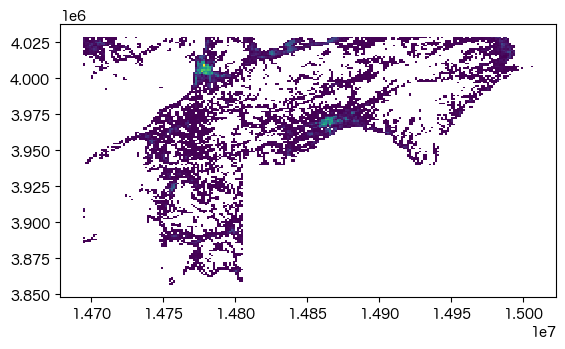

In [26]:
# make a quick plot
kochimesh.plot(column='T001100001')

<Axes: >

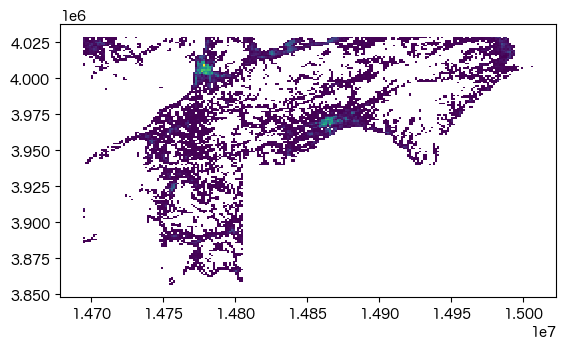

In [27]:
# make a quick plot
kochimesh.plot(column='T000846001')

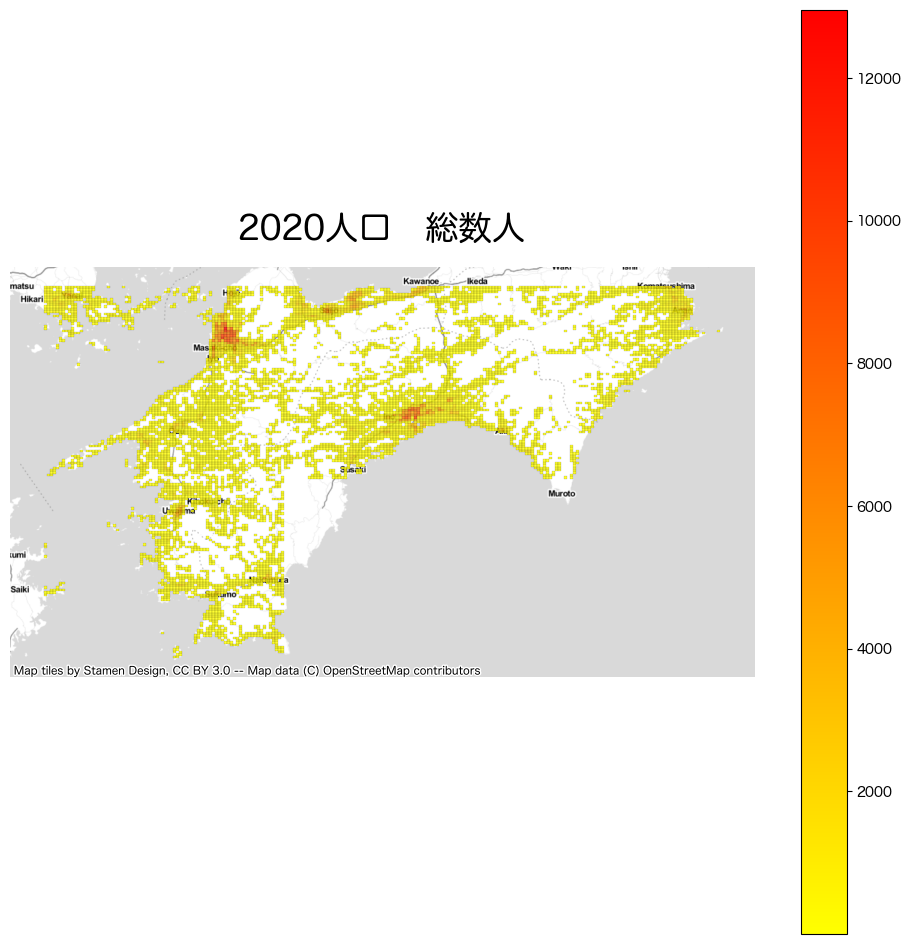

In [28]:
# 2020 population map
ax = kochimesh.plot(figsize=(12,12),
         column='T001100001',
         legend=True,
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8
         )

# hide axes
ax.axis('off')

# title
ax.set_title('2020人口　総数人',fontsize=24, pad=20) # タイトルの周りにスペースを足すために pad=20

# add basemap
cx.add_basemap(ax,source=cx.providers.Stamen.TonerLite)

In [29]:
# 
ax.set_xlim(kochimesh.total_bounds[0],kochimesh.total_bounds[2])
ax.set_ylim(kochimesh.total_bounds[1],kochimesh.total_bounds[3])

(3856653.7753284285, 4028802.026134408)

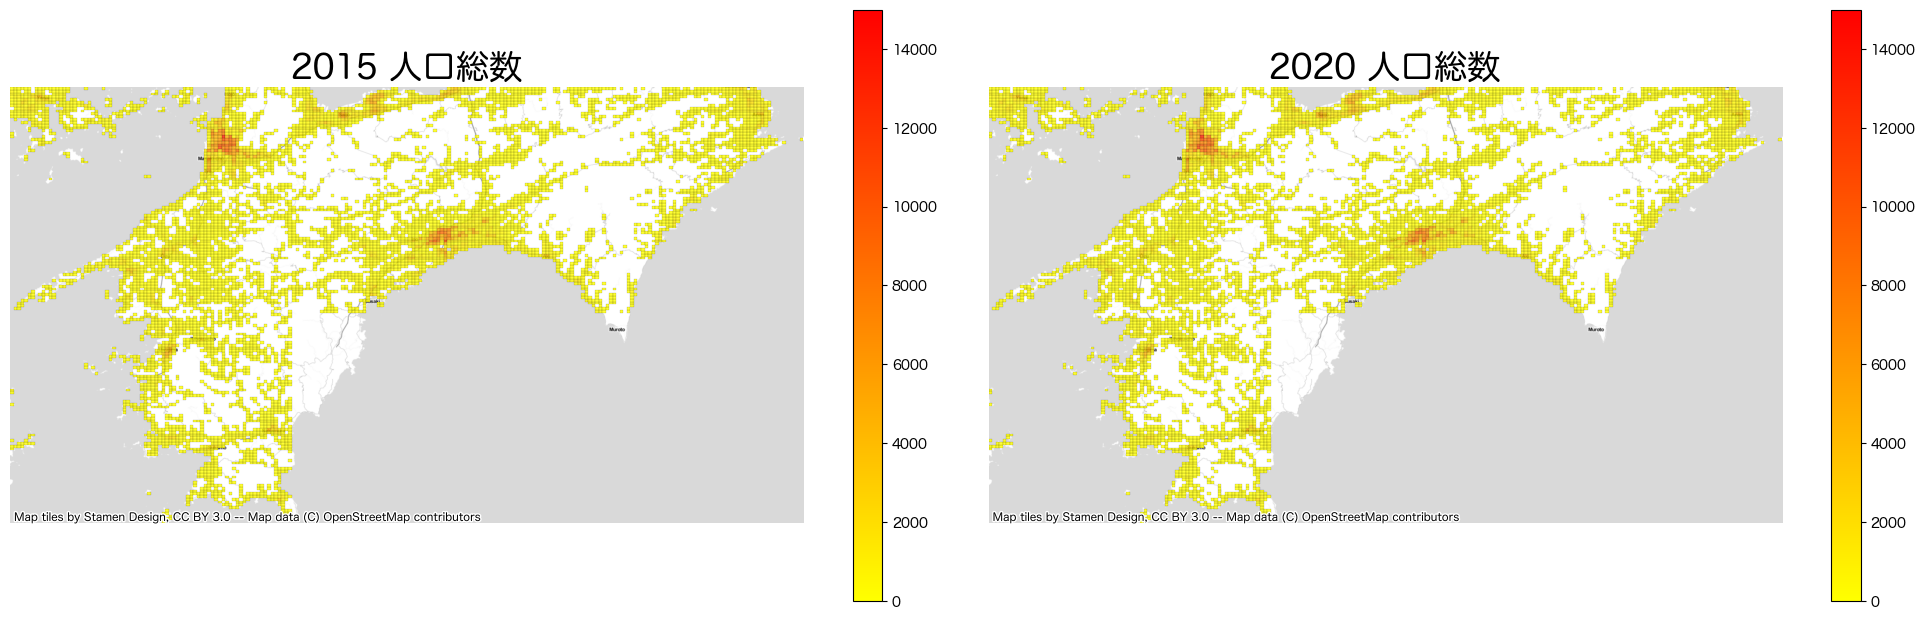

In [31]:
# population map
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,20)) # 1 row, 2 columns, side by side

# 2015 population
kochimesh.plot(ax = ax[0], # 左のマップ
    column='T000846001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# 2020 population
kochimesh.plot(ax = ax[1], # 右のマップ
    column='T001100001',
         legend=True,
         legend_kwds={'shrink': 0.3},
         cmap='autumn_r',
         edgecolor='black',
         linewidth=0.1,
         alpha=0.8,
         vmin=0,
         vmax=15000)

# hide axes
ax[0].axis('off') # 左
ax[1].axis('off') # 右

# title
ax[0].set_title('2015 人口総数',fontsize=24); # 左
ax[1].set_title('2020 人口総数',fontsize=24); # 右

# Get the total bounds of the geometries
xmin, ymin, xmax, ymax = kochimesh.total_bounds

# Set the plot limits based on the total bounds
ax[0].set_xlim(xmin, xmax) # 左
ax[0].set_ylim(ymin, ymax) # 左 
ax[1].set_xlim(xmin, xmax) # 右
ax[1].set_ylim(ymin, ymax) # 右

# サブプロット間のスペースを調整
plt.tight_layout()

# add basemap
cx.add_basemap(ax[0],source=cx.providers.Stamen.TonerLite) # 左
cx.add_basemap(ax[1],source=cx.providers.Stamen.TonerLite) # 右